# Linear Algebra for Machine Learning and Data Science

Matrices are commonly used in machiine learning and data science to represent data and its transformations.

## Systems of linear equations

Matrices are commonly used in machine learning and data science to represent data and its transformations.
$$ Ax = b $$

$$ Cov(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) $$


When doing PCA, we want to preserve as much variance as possible. The Covariance Matrix of the dataset will yield eigenvalues and eigenvectors. To preserve the most information, we want to select the Principal Components (which are mixtures of original variables) corresponding to the largest eigenvalues. Having data at different scales will distort the construction of these components, causing the PCA to be biased toward variables with larger magnitudes.

<img src="img/1 PCA Selecting Eigenvalues.png" alt="Selecting Eigenvalues" width="500"/>

[-5.  5.]


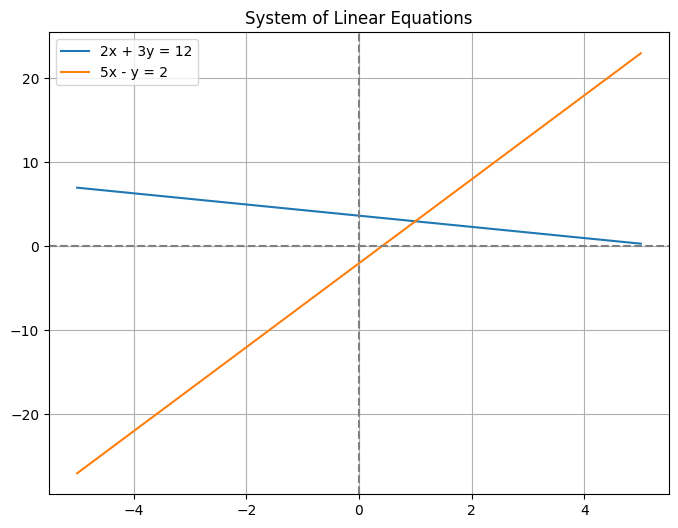

Matrix A (Coefficients):
[[ 2  3]
 [ 5 -1]]

Vector b (Constants):
[11  2]

Solution [x, y]: [1. 3.]


In [19]:

import numpy as np
import matplotlib.pyplot as plt

# Consider the system:
# 2x + 3y = 11
# 5x - 1y = 2

# 1. Visualize the system as intersecting lines
x = np.linspace(-5, 5, 2)
print(x)

# Rewrite equations as y = mx + c
# y = (8 - 2x) / 3
y1 = (11 - 2*x) / 3
# y = 5x - 2
y2 = 5*x - 2 / 1

plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='2x + 3y = 12')
plt.plot(x, y2, label='5x - y = 2')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.title("System of Linear Equations")
plt.show()

# 2. Model as a Matrix: Ax = b
# Coefficient Matrix A
A = np.array([
    [2, 3],
    [5, -1]
])

# Constant Vector b
b = np.array([11, 2])

print("Matrix A (Coefficients):")
print(A)
print("\nVector b (Constants):")
print(b)

# Solve for x (which represents [x, y])
solution = np.linalg.solve(A, b)
print(f"\nSolution [x, y]: {solution}")

In [21]:
# ... existing code ...
import numpy as np
import matplotlib.pyplot as plt

# Consider the system with 3 variables:
# 2x + 3y + z = 5
# 5x - y + 2z = 2
# x + y + z = 4

# Model as a Matrix: Ax = b
# Coefficient Matrix A (now 3x3)
A = np.array([
    [2, 3, 1],
    [5, -1, 2],
    [1, 1, 1]
])

# Constant Vector b
b = np.array([5, 2, 4])

print("Matrix A (Coefficients):")
print(A)
print("\nVector b (Constants):")
print(b)

# Solve for x (which represents [x, y, z])
solution = np.linalg.solve(A, b)
print(f"\nSolution [x, y, z]: {solution}")

Matrix A (Coefficients):
[[ 2  3  1]
 [ 5 -1  2]
 [ 1  1  1]]

Vector b (Constants):
[5 2 4]

Solution [x, y, z]: [-1.  1.  4.]


In [3]:
A_{\text{reflection\_yaxis}} =
\begin{bmatrix}
-1 & 0 \\
 0 & 1
\end{bmatrix}

SyntaxError: unexpected character after line continuation character (3762841449.py, line 1)

A_{\text{reflection\_yaxis}} =
\begin{bmatrix}
-1 & 0 \\
 0 & 1
\end{bmatrix}

\begin{pmatrix}
-1 & 2 \\
 0 & 1
\end{pmatrix}

\begin{bmatrix}
-1 & 2 \\
 0 & 1
\end{bmatrix}

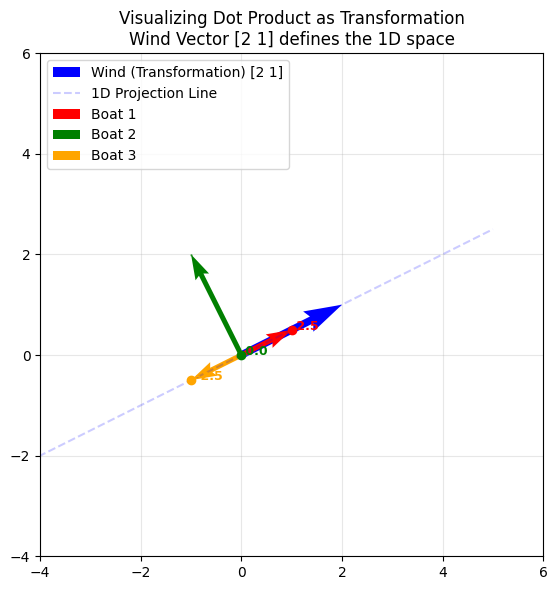

In [1]:
# ... existing code ...
# ## Duality of the Dot Product: Wind as a Transformation
#
# Here we visualize a vector $\vec{v}$ (Wind) not just as an arrow, but as a linear transformation that maps other vectors (Boat paths) onto a 1D number line (Work done).
import matplotlib.pyplot as plt
import numpy as np


def plot_duality_visual(wind_vector, boat_vectors):
    """
    Visualizes the dot product as a projection/transformation.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # 1. Plot the Wind Vector (The Transformation)
    origin = np.array([0, 0])
    ax.quiver(*origin, *wind_vector, color='blue', scale=1, scale_units='xy', angles='xy', width=0.015,
              label=f'Wind (Transformation) {wind_vector}')

    # Create the "Number Line" defined by the wind vector span
    # We extend the line of the wind vector to show the 1D space we are projecting onto
    line_x = np.linspace(-5, 5, 100)
    slope = wind_vector[1] / wind_vector[0] if wind_vector[0] != 0 else 0
    line_y = slope * line_x

    # If wind is vertical handle slope separately
    if wind_vector[0] == 0:
        ax.axvline(x=0, color='blue', alpha=0.2, linestyle='--')
    else:
        ax.plot(line_x, line_y, color='blue', alpha=0.2, linestyle='--', label='1D Projection Line')

    # 2. Plot Boat Vectors and their Projections (The Application of the Transformation)
    colors = ['red', 'green', 'orange']

    for i, boat in enumerate(boat_vectors):
        # Plot boat vector
        ax.quiver(*origin, *boat, color=colors[i], scale=1, scale_units='xy', angles='xy', width=0.01,
                  label=f'Boat {i + 1}')

        # Calculate Dot Product (The linear transformation result)
        # Transform: L(v) = dot(wind, boat)
        dot_prod = np.dot(wind_vector, boat)

        # Find projection point on the wind line for visualization
        # proj_w_v = (v . w / |v|^2) * v
        wind_mag_sq = np.dot(wind_vector, wind_vector)
        projection = (dot_prod / wind_mag_sq) * wind_vector

        # Draw projection line (dashed)
        ax.plot([boat[0], projection[0]], [boat[1], projection[1]], color=colors[i], linestyle=':', alpha=0.6)

        # Mark the result on the "Number Line"
        ax.plot(projection[0], projection[1], 'o', color=colors[i])
        ax.text(projection[0], projection[1], f' {dot_prod:.1f}', fontsize=9, color=colors[i], fontweight='bold')

    ax.set_xlim(-4, 6)
    ax.set_ylim(-4, 6)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    ax.set_title(f"Visualizing Dot Product as Transformation\nWind Vector {wind_vector} defines the 1D space")

    plt.tight_layout()
    plt.show()


# Define the Wind (The Transformation Vector)
v_wind = np.array([2, 1])

# Define different Boats (Input Vectors)
# Boat 1: Aligned with wind (High output)
# Boat 2: Perpendicular (Zero output - Null Space)
# Boat 3: Against wind (Negative output)
boats = [
    np.array([1, 0.5]),
    np.array([-1, 2]),
    np.array([-1, -0.5])
]

plot_duality_visual(v_wind, boats)

In [ ]:
def center_data(Y):
    """
    Center your original data
    Args:
         Y (ndarray): input data. Shape (n_observations x n_pixels)
    Outputs:
        X (ndarray): centered data
    """
    ### START CODE HERE ###

    mean_vector = np.mean(Y, axis=0) # Calculate mean per column (axis=0)

    repeated_means = np.repeat(mean_vector, 55)

    mean_matrix = np.reshape(repeated_means, (Y.shape), order='F')

    X = Y - mean_vector
    ### END CODE HERE ###
    return X

In [2]:
def perform_PCA(X, eigenvecs, k):
    """
    Perform dimensionality reduction with PCA
    Inputs:
        X (ndarray): original data matrix. Has dimensions (n_observations)x(n_variables)
        eigenvecs (ndarray): matrix of eigenvectors. Each column is one eigenvector. The k-th eigenvector
                            is associated to the k-th eigenvalue
        k (int): number of principal components to use
    Returns:
        Xred
    """

    ### START CODE HERE ###
    V = eigenvecs[:, :k]  # Select first k eigenvectors (columns)
    Xred = np.dot(X, V)
    ### END CODE HERE ###
    return Xred

In [3]:
def get_cov_matrix(X):
    """ Calculate covariance matrix from centered data X
    Args:
        X (np.ndarray): centered data matrix
    Outputs:
        cov_matrix (np.ndarray): covariance matrix
    """

    ### START CODE HERE ###
    cov_matrix = np.dot(np.transpose(X), X) /
    ### END CODE HERE ###

    return cov_matrix